# Features comparison

In this notebook, we will merge and compare all features computed in this study

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import catalog
import computations as cp
import figures

catalog.display_parameters()

## Load catalog

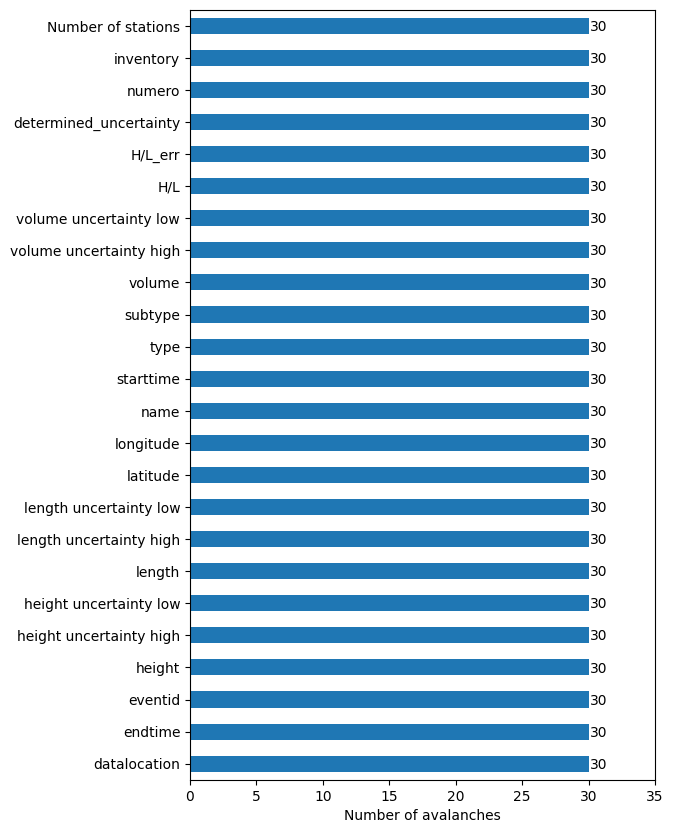

In [2]:
ESEC_avalanches = catalog.load("catalog/9_ESEC_avalanches_30.pickle")

catalog.open_plot(ESEC_avalanches, pos_number=0.15, xlim=35) 

## Load features

First, we will merge all the features

In [3]:
## Merge dataframes computed from "10_fitting_spectrum" and "11_compute_energy"
fitting_1 = cp.merge_dataframes(dossier = "features/1_fitting/data", name = "curve_parameters*.csv", area_to_save = 'features/1_fitting/data/fitting_1.csv')
energy_2 = cp.merge_dataframes(dossier = "features/2_energie/data", name = "dataframe_event_*.csv", area_to_save = 'features/2_energie/data/energy_2.csv')

## Load all features from "10_fitting_spectrum", "11_compute_energy" and "12_compute_entropy"
fitting_1 = pd.read_csv("features/1_fitting/data/fitting_1.csv")
energy_2 = pd.read_csv("features/2_energie/data/energy_2.csv")
entropy_3 = pd.read_csv('features/3_entropie/data/curve_parameters.csv')

## Rename all the columns "Event Index" with the same name
fitting_1.rename(columns={'Event Index': 'event_index'}, inplace=True)
energy_2.rename(columns={'Event Index': 'event_index'}, inplace=True)
entropy_3.rename(columns={'Event Index': 'event_index'}, inplace=True)

## Merge all features
features_dataframe = fitting_1.merge(energy_2, on='event_index', how='outer').merge(entropy_3, on='event_index', how='outer')

## Removed events that could not have an entropy calculation
features_dataframe = features_dataframe.dropna()

print("Finally,", len(features_dataframe), "events could be preserved in this study")

## Reset the index and save the dataframe with the features
features_dataframe = features_dataframe.reset_index(drop=True)
features_dataframe.to_pickle("catalog/10_features_dataframe.pickle")

Finally, 30 events could be preserved in this study


## Explore the results

Correlations or links between features will be searched.

In [4]:
## Uncomment this line to see the list of the features
#features_dataframe.head(0)

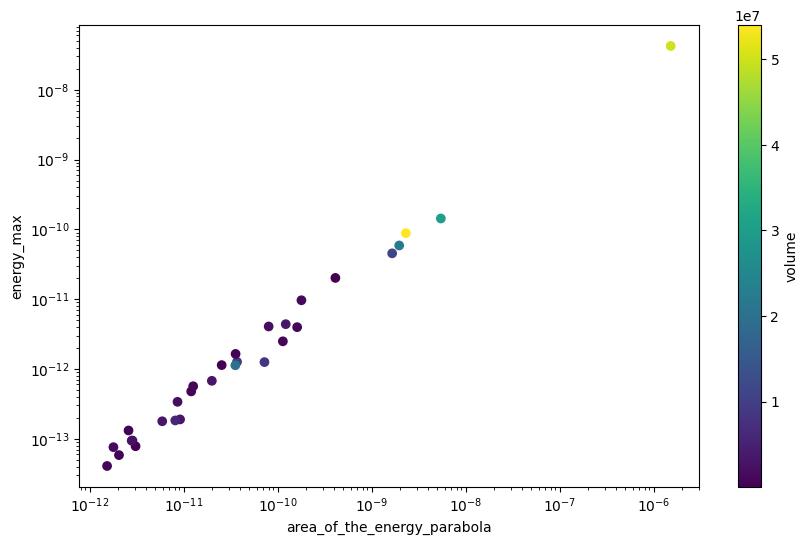

In [5]:
## Here, it is possible to find correlations or links between features. Change X, Y or Z

X = "area_of_the_energy_parabola"
Y = "energy_max"
Z = "volume"

plt.figure(figsize=(10, 6))
plt.scatter(features_dataframe[X], features_dataframe[Y], c=features_dataframe[Z])

plt.xlabel(X)
plt.ylabel(Y)
plt.colorbar(label=Z)

plt.xscale("log")
plt.yscale("log")

figures.save(f"figures/final/figures_{X}_{Y}_{Z}", tight_layout=False)
plt.show()